In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
hr_df = pd.read_csv(r'C:\Users\AA\DataScience\datasets\hr_data.csv')
hr_df

satisfaction_level  last_evaluation  number_project  \
0                    0.24             0.79               2   
1                    0.40             0.49               2   
2                    0.45             0.45               2   
3                    0.46             0.73               6   
4                    0.14             0.54               5   
...                   ...              ...             ...   
14999                0.71             0.66               5   
15000                0.75             0.84               3   
15001                0.32             0.41               3   
15002                0.62             0.58               3   
15003                0.81             0.94               3   

       average_montly_hours  time_spend_company  Work_accident left  \
0                       175                   5              0    0   
1                       155                   3              0    1   
2                       154                   3              1    1   
3                       256                   4              0    0   
4                       275                   4              1    0   
...                     ...                 ...            ...  ...   
14999                   187                   2              0    0   
15000                   145                   3              1    0   
15001                   138                   3              1    0   
15002                   148                   2              1    0   
15003                   225                   4              0    0   

       promotion_last_5years   Department  salary   age  
0                          0           IT     low   NaN  
1                          0           hr  medium  27.0  
2                          0      support  medium   NaN  
3                          0  product_mng    high   NaN  
4                          0        sales    high   NaN  
...                      ...          ...     ...   ...  
14999                      0        sales  medium   NaN  
15000                      0      support     low   NaN  
15001                      0    technical  medium  29.0  
15002                      0    technical     low   NaN  
15003                      0           hr  medium   NaN  

[15004 rows x 11 columns]

In [3]:
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15004 entries, 0 to 15003
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     15004 non-null  float64
 1   last_evaluation        15004 non-null  float64
 2   number_project         15004 non-null  int64  
 3   average_montly_hours   15004 non-null  int64  
 4   time_spend_company     15004 non-null  int64  
 5   Work_accident          15004 non-null  int64  
 6   left                   15004 non-null  object 
 7   promotion_last_5years  15004 non-null  int64  
 8   Department             15004 non-null  object 
 9   salary                 14975 non-null  object 
 10  age                    3080 non-null   float64
dtypes: float64(3), int64(5), object(3)
memory usage: 1.3+ MB


In [4]:
hr_df.left.unique()

array(['0', '1', '?'], dtype=object)

In [5]:
hr_df.replace(['?', '', 'n/a', '-', '--'], np.nan, inplace=True)
hr_df.isna().sum()

satisfaction_level           0
last_evaluation              0
number_project               0
average_montly_hours         0
time_spend_company           0
Work_accident                0
left                         4
promotion_last_5years        0
Department                   0
salary                      29
age                      11924
dtype: int64

In [6]:
hr_df.dropna(subset=['left'], inplace=True)
hr_df.left.unique()

array(['0', '1'], dtype=object)

In [7]:
hr_df.age.unique()

array([nan, 27., 25., 28., 29., 26.])

In [8]:
hr_df.drop(columns=['age'],axis='column',inplace=True)
hr_df

satisfaction_level  last_evaluation  number_project  \
0                    0.24             0.79               2   
1                    0.40             0.49               2   
2                    0.45             0.45               2   
3                    0.46             0.73               6   
4                    0.14             0.54               5   
...                   ...              ...             ...   
14999                0.71             0.66               5   
15000                0.75             0.84               3   
15001                0.32             0.41               3   
15002                0.62             0.58               3   
15003                0.81             0.94               3   

       average_montly_hours  time_spend_company  Work_accident left  \
0                       175                   5              0    0   
1                       155                   3              0    1   
2                       154                   3              1    1   
3                       256                   4              0    0   
4                       275                   4              1    0   
...                     ...                 ...            ...  ...   
14999                   187                   2              0    0   
15000                   145                   3              1    0   
15001                   138                   3              1    0   
15002                   148                   2              1    0   
15003                   225                   4              0    0   

       promotion_last_5years   Department  salary  
0                          0           IT     low  
1                          0           hr  medium  
2                          0      support  medium  
3                          0  product_mng    high  
4                          0        sales    high  
...                      ...          ...     ...  
14999                      0        sales  medium  
15000                      0      support     low  
15001                      0    technical  medium  
15002                      0    technical     low  
15003                      0           hr  medium  

[15000 rows x 10 columns]

In [9]:
hr_df.salary.unique()

array(['low', 'medium', 'high', nan], dtype=object)

In [10]:
hr_df.salary.fillna(hr_df.salary.mode().values[0], inplace=True)
hr_df.salary.unique()

array(['low', 'medium', 'high'], dtype=object)

In [11]:
hr_df.shape

(15000, 10)

<Axes: xlabel='left', ylabel='count'>

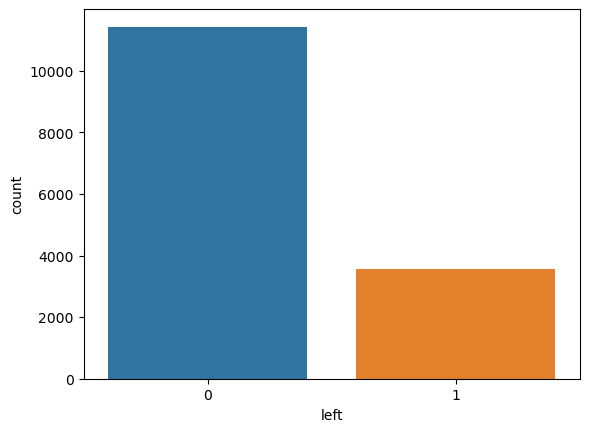

In [12]:
#Count plot of target variable
sns.countplot(x='left', data = hr_df)

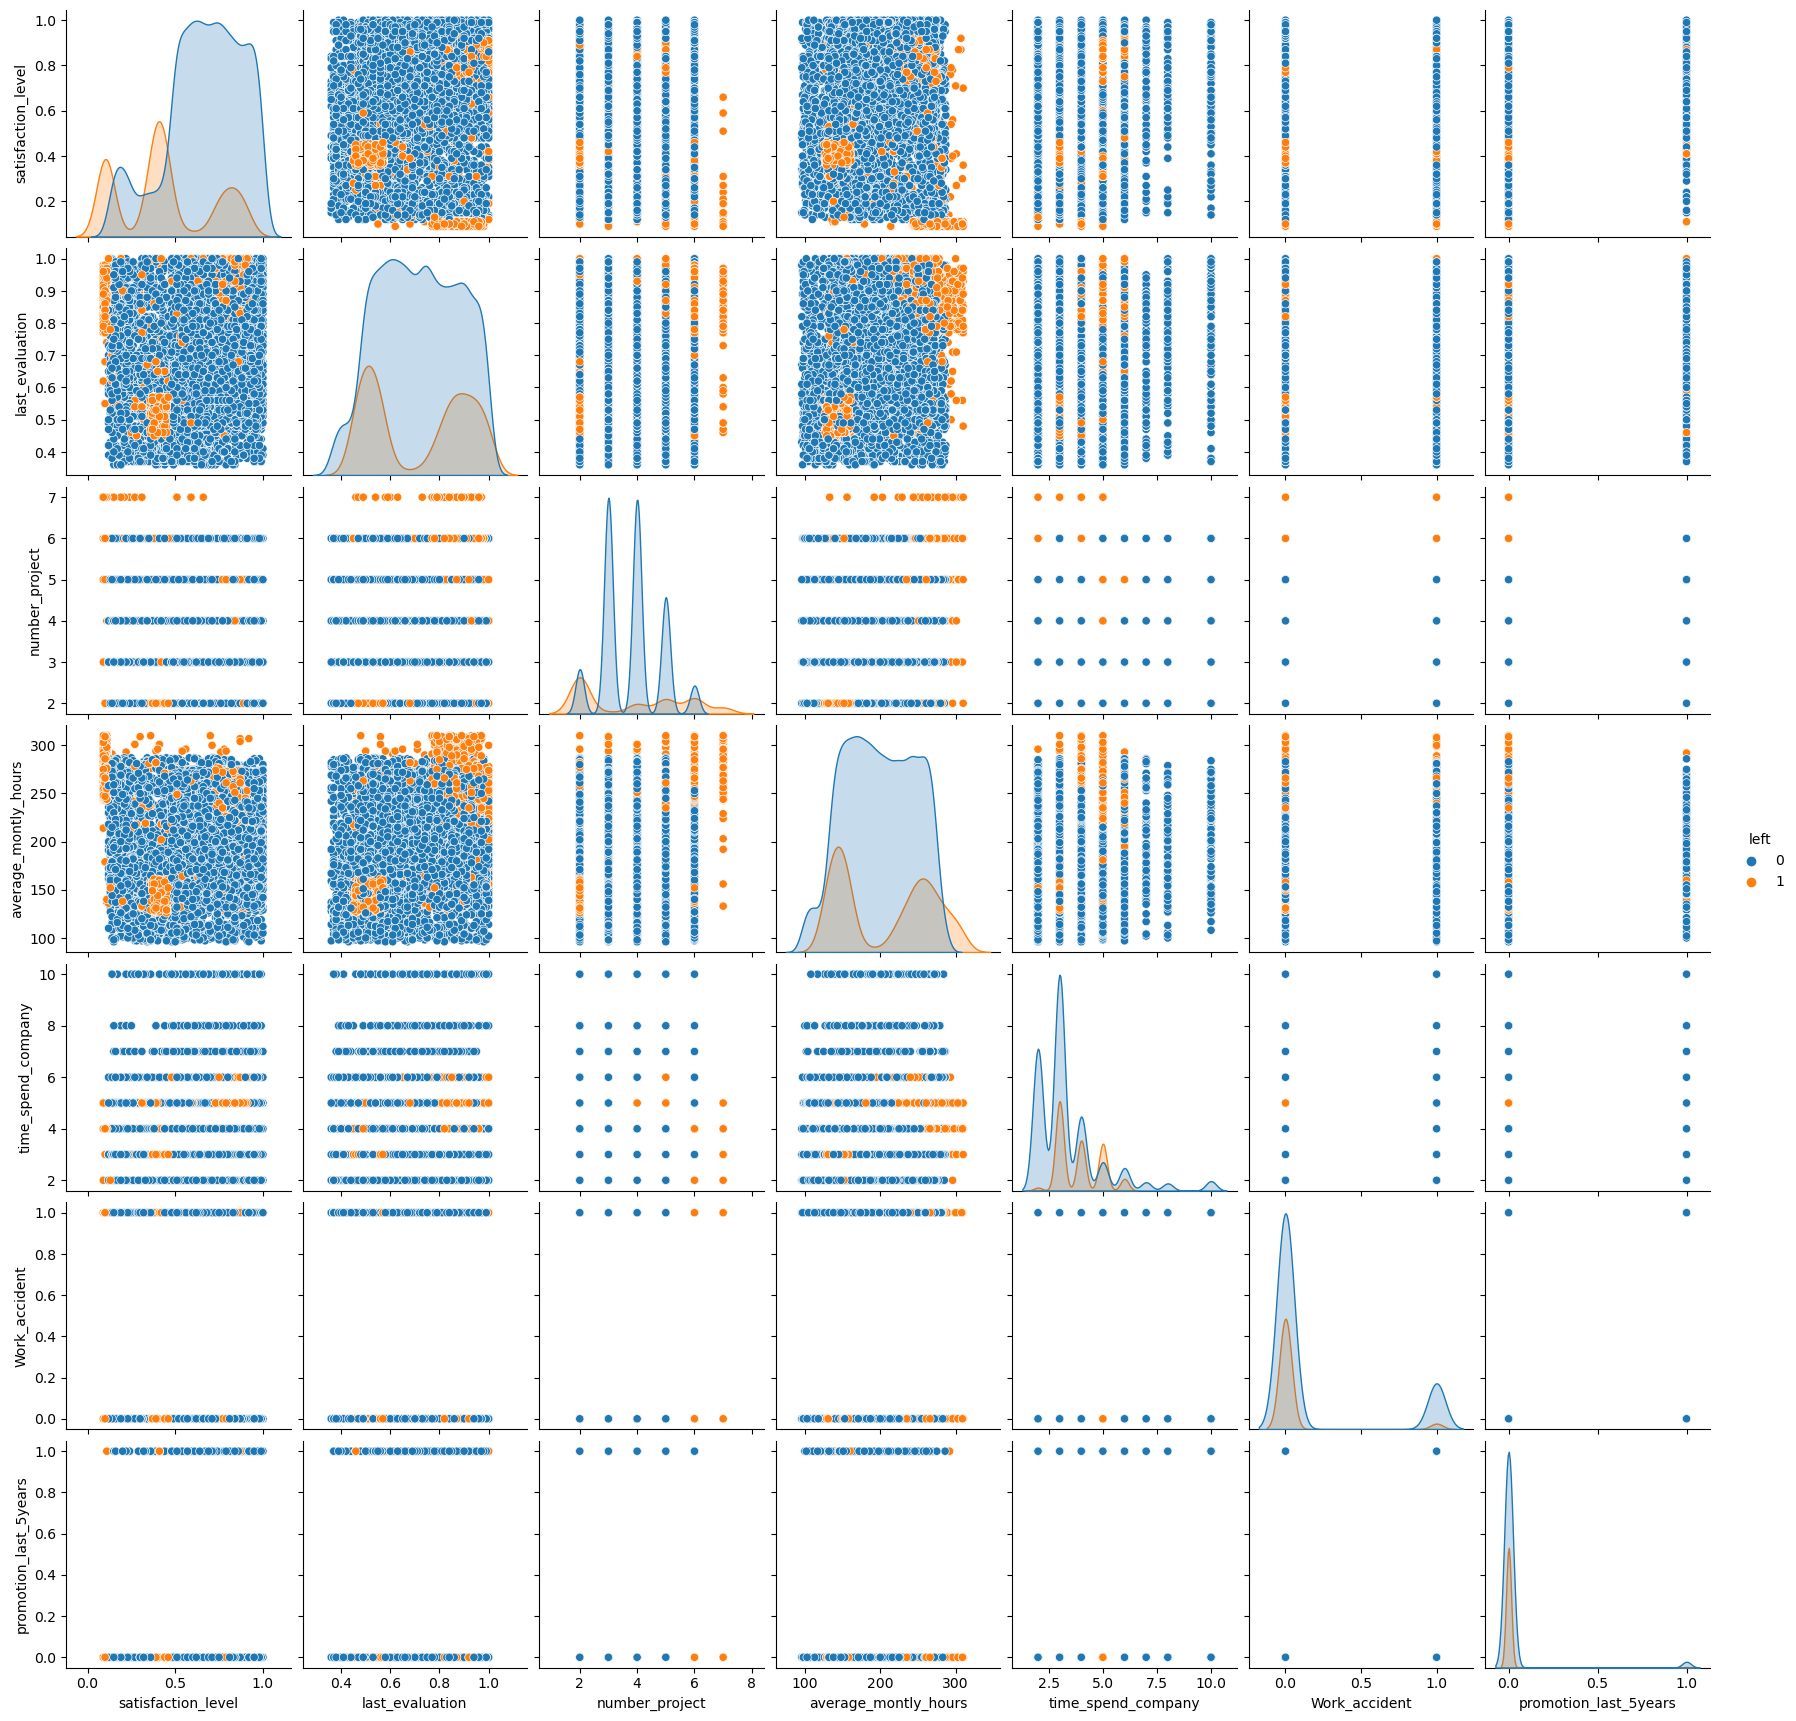

In [13]:
sns.pairplot(hr_df,hue='left')

<Axes: xlabel='salary', ylabel='count'>

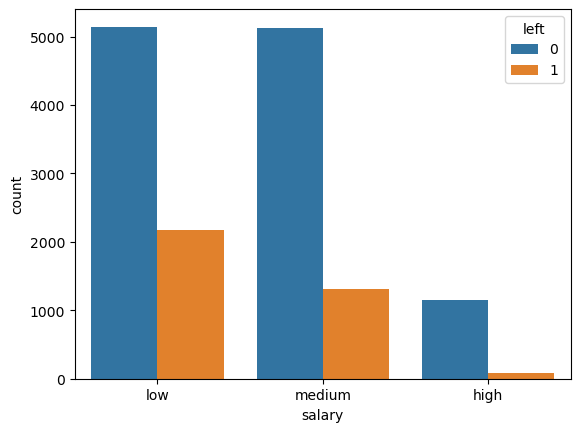

In [14]:
sns.countplot(x='salary', hue='left', data = hr_df)

Setting our features of satisfaction_level,average_montly_hours,promotion_last_5years,salary and target as left :

In [15]:
hr_df = hr_df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary','left']]
hr_df.head()

satisfaction_level  average_montly_hours  promotion_last_5years  salary  \
0                0.24                   175                      0     low   
1                0.40                   155                      0  medium   
2                0.45                   154                      0  medium   
3                0.46                   256                      0    high   
4                0.14                   275                      0    high   

  left  
0    0  
1    1  
2    1  
3    0  
4    0

Here there salary is categorical value so we will convert it to numericl values as:

In [16]:
salary = pd.get_dummies(hr_df['salary'],dtype=int)

In [17]:
salary.head()

high  low  medium
0     0    1       0
1     0    0       1
2     0    0       1
3     1    0       0
4     1    0       0

In [18]:
hr_df = pd.concat([hr_df,salary],axis='columns')
hr_df.head()

satisfaction_level  average_montly_hours  promotion_last_5years  salary  \
0                0.24                   175                      0     low   
1                0.40                   155                      0  medium   
2                0.45                   154                      0  medium   
3                0.46                   256                      0    high   
4                0.14                   275                      0    high   

  left  high  low  medium  
0    0     0    1       0  
1    1     0    0       1  
2    1     0    0       1  
3    0     1    0       0  
4    0     1    0       0

In [19]:
hr_df.drop(['salary'],axis=1,inplace=True)
hr_df.head()

satisfaction_level  average_montly_hours  promotion_last_5years left  high  \
0                0.24                   175                      0    0     0   
1                0.40                   155                      0    1     0   
2                0.45                   154                      0    1     0   
3                0.46                   256                      0    0     1   
4                0.14                   275                      0    0     1   

   low  medium  
0    1       0  
1    0       1  
2    0       1  
3    0       0  
4    0       0

# Training and Testing Model

In [20]:
x_feature = hr_df.drop('left', axis=1)
y_target = hr_df['left']

In [21]:
print(x_feature)

       satisfaction_level  average_montly_hours  promotion_last_5years  high  \
0                    0.24                   175                      0     0   
1                    0.40                   155                      0     0   
2                    0.45                   154                      0     0   
3                    0.46                   256                      0     1   
4                    0.14                   275                      0     1   
...                   ...                   ...                    ...   ...   
14999                0.71                   187                      0     0   
15000                0.75                   145                      0     0   
15001                0.32                   138                      0     0   
15002                0.62                   148                      0     0   
15003                0.81                   225                      0     0   

       low  medium  
0        1       0

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [23]:
x_feature_train, x_feature_test , y_target_train, y_target_test = train_test_split(x_feature, y_target, test_size=0.2, random_state=42)

In [24]:
del hr_df, salary, x_feature, y_target

In [25]:
#creating train and evaluating function

def train_model(x_feature_train,y_target_train, model, hyperparameters):
  
    # Perform grid search with cross-validation
    grid_search = GridSearchCV(estimator=model, param_grid=hyperparameters, cv=5)
    grid_search.fit(x_feature_train, y_target_train)
    
    # Print the best hyperparameters found
    best_params = grid_search.best_params_
    print("Best Hyperparameters:", best_params)
    
    # Train the model with best hyperparameters
    best_model = model.set_params(**best_params)
    best_model.fit(x_feature_train, y_target_train)
    
    return best_params, best_model

In [26]:
def evaluate_model(x_feature_test, y_target_test, best_model):
    
    
    # Predict the target values for the test set
    y_pred = best_model.predict(x_feature_test)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_target_test, y_pred)
    precision = precision_score(y_target_test, y_pred, pos_label='1')
    recall = recall_score(y_target_test, y_pred, pos_label='1')
    f1 = f1_score(y_target_test, y_pred, pos_label='1')
    
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    
    return accuracy, precision, recall, f1

# 1. K-Nearest Neighbors (KNN)    

In [27]:

hyperparameters = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
}

model = KNeighborsClassifier()
_, best_model = train_model(x_feature_train, y_target_train, model, hyperparameters)
scores = evaluate_model(x_feature_test, y_target_test, best_model)

Best Hyperparameters: {'n_neighbors': 7, 'weights': 'distance'}
Accuracy: 0.9213333333333333
Precision: 0.8154681139755766
Recall: 0.8573466476462197
F1 Score: 0.8358831710709319


# 2. Logistic Regression

In [28]:
hyperparameters = {
    'C':[0.0001,0.001,0.01,0.1,1],
    'penalty':['l1','l2'],
    'solver':['liblinear']
}

model = LogisticRegression()
_, best_model = train_model(x_feature_train,y_target_train,model,hyperparameters)
scores = evaluate_model(x_feature_test,y_target_test,best_model)

Best Hyperparameters: {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy: 0.8063333333333333
Precision: 0.718978102189781
Recall: 0.2810271041369472
F1 Score: 0.4041025641025641


# 3.Decision Tree Classifier

In [30]:
hyperparameters = {
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 5, 10]
}

model = DecisionTreeClassifier()
_, best_model = train_model(x_feature_train, y_target_train, model, hyperparameters)
scores = evaluate_model(x_feature_test, y_target_test, best_model)

Best Hyperparameters: {'max_depth': 5, 'min_samples_split': 2}
Accuracy: 0.915
Precision: 0.9477911646586346
Recall: 0.6733238231098431
F1 Score: 0.7873227689741451


# 4.Naive Bayes Classifier

In [32]:
hyperparameters={
    'var_smoothing':[10**(-x) for x in range(1,11)]
}
model = GaussianNB()
_, best_model = train_model(x_feature_train,y_target_train,model,hyperparameters)
scores = evaluate_model(x_feature_test,y_target_test,best_model)

Best Hyperparameters: {'var_smoothing': 1e-05}
Accuracy: 0.8146666666666667
Precision: 0.6194398682042833
Recall: 0.536376604850214
F1 Score: 0.5749235474006117


# 5.Random Forest Classifier

In [34]:
hyperparameters = {
    'n_estimators': [200, 300, 400, 500],
    'max_depth': [11, 13, 15, 17],
    'min_samples_split': [2, 5]
}

model = RandomForestClassifier()
_, best_model = train_model(x_feature_train, y_target_train, model, hyperparameters)
scores = evaluate_model(x_feature_test, y_target_test, best_model)

Best Hyperparameters: {'max_depth': 17, 'min_samples_split': 2, 'n_estimators': 400}
Accuracy: 0.941
Precision: 0.891044776119403
Recall: 0.8516405135520685
F1 Score: 0.8708971553610503


Here we did a comparative study of different classifier algorithms. Among all the five algorithms Random Forest Classifier gave the best result for our problem with the test f1-score of 87.19%